# Projeto Airbnb - versão portfólio

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import int64
import plotly.express as px
import seaborn as sns
from matplotlib import gridspec
from matplotlib import pyplot as plt

## Functions

In [2]:
def show_dtypes( data ):
    print( data.dtypes )
    return None

def show_dimensions ( data ):
    print('Number of rows: {}'.format(data.shape[0]), end='\n\n')
    print('Number of columns: {}'.format(data.shape[1]), end='\n\n')
    return None

## Data load, clean and transformation

In [3]:
# Data load
df = pd.read_csv('datasets\AB_NYC_2019.csv')
df.head()
# Data dimension
show_dimensions(df)
# Data type
show_dtypes(df)

Number of rows: 48895

Number of columns: 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Dicionário de dados

* id: código do imóvel name: nome do imóvel host_id: código do anfitrião host_name: nome do anfitrião
* neighbourhood_group: localização/bairro - 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'
* neighbourhood: área do bairro/região (221 áreas diferentes)
* latitude: latitude
* longitude: longitude
* room_type: tipo do imóvel: 'Private room', 'Entire home/apt', 'Shared room'
* price: preço da diária (dólares)
* minimum_nights: mínimo de diárias
* number_of_reviews: diárias alugadas
* last_review: últimas avaliações (data)
* reviews_per_month: avaliações por mês
* calculated_host_listings_count: Quantos imóveis tem o anfitrião
* availability_365: quantidade de dias que o anúncio foi disponibilizado 
* Fonte: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
df.neighbourhood.unique()
len(df.neighbourhood.unique())

221

In [9]:
# List unique room type
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
# Null values and duplicates
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df['reviews_per_month'].fillna(0, inplace = True)

In [12]:
print(len(df['id'].unique()))

48895


In [ ]:
len(df['id'].drop_duplicates())

## Descriptive statistics

In [14]:
# Descriptive statistics
conj_num = df.select_dtypes(include=['int64', 'float64'])

# Median and mean
pd.set_option('display.float_format', lambda x: '%.5f' %x)
media = pd.DataFrame( conj_num.apply(np.mean, axis=0))
mediana = pd.DataFrame(conj_num.apply(np.median, axis=0))

# Minimum, maximum and standard deviation
std = pd.DataFrame(conj_num.apply(np.std, axis=0))
min_ = pd.DataFrame(conj_num.apply(np.min, axis=0))
max_ = pd.DataFrame(conj_num.apply(np.max, axis=0))

df1 = pd.concat([max_, min_, media, mediana, std], axis=1).reset_index()
df1.columns = ['atributes', 'maximo', 'minimo', 'media','mediana','std' ]

show_dimensions( df1 )
df1

Number of rows: 10

Number of columns: 6



,atributes,maximo,minimo,media,mediana,std
0,id,36487245.00000,2539.00000,19017143.23618,19677284.00000,10982996.07183
1,host_id,274321313.00000,2438.00000,67620010.64661,30793816.00000,78610163.15324
2,latitude,40.91306,40.49979,40.72895,40.72307,0.05453
3,longitude,-73.71299,-74.24442,-73.95217,-73.95568,0.04616
4,price,10000.00000,0.00000,152.72069,106.00000,240.15171
5,minimum_nights,1250.00000,1.00000,7.02996,3.00000,20.51034
6,number_of_reviews,629.00000,0.00000,23.27447,5.00000,44.55013
7,reviews_per_month,58.50000,0.00000,1.09091,0.37000,1.59727
8,calculated_host_listings_count,327.00000,1.00000,7.14398,1.00000,32.95218
9,availability_365,365.00000,0.00000,112.78133,45.00000,131.62094


In [15]:
# Highest price  
df[['id', 'price']].sort_values ('price', ascending=False).reset_index(drop=True).loc[0, 'price']

10000

In [18]:
# Cheapest price
df1=df.where(df['price']>0).sort_values ('price', ascending=True).reset_index(drop=True)
df1.head(16)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,19415314.00000,"Girls only, cozy room one block from Times Square",47336995.00000,Mario,Manhattan,Hell's Kitchen,40.75812,-73.98935,Shared room,10.00000,1.00000,2.00000,2017-06-24,0.08000,1.00000,0.00000
1,25839759.00000,Gigantic Sunny Room in Park Slope-Private Back...,167570251.00000,Rachel,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10.00000,1.00000,14.00000,2018-10-28,1.06000,1.00000,4.00000
2,26235873.00000,Voted #1 Airbnb In NYC,197169969.00000,Maria,Queens,Jamaica,40.68939,-73.79886,Entire home/apt,10.00000,2.00000,22.00000,2019-07-06,1.76000,1.00000,332.00000
3,24114389.00000,"Very Spacious bedroom, steps from CENTRAL PARK.",180661875.00000,Salim,Manhattan,Upper West Side,40.76844,-73.98333,Private room,10.00000,1.00000,2.00000,2018-04-23,0.13000,1.00000,0.00000
4,28270998.00000,"Charming, bright and brand new Bed-Stuy home",647528.00000,Caterina,Brooklyn,Bedford-Stuyvesant,40.69508,-73.95164,Entire home/apt,10.00000,3.00000,5.00000,2019-07-02,0.51000,1.00000,0.00000
5,1620248.00000,Large furnished 2 bedrooms- - 30 days Minimum,2196224.00000,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10.00000,30.00000,0.00000,NaN,0.00000,4.00000,137.00000
6,24412104.00000,Cozy feel at home studio,91034542.00000,Maureen,Manhattan,Kips Bay,40.74408,-73.97803,Private room,10.00000,5.00000,42.00000,2019-06-30,2.87000,1.00000,2.00000
7,18835820.00000,"Quiet, Cozy UES Studio Near the Subway",52777892.00000,Amy,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10.00000,3.00000,10.00000,2018-10-22,0.39000,1.00000,0.00000
8,26496645.00000,Room with a view,110049861.00000,Martin,Brooklyn,Williamsburg,40.70959,-73.95693,Private room,10.00000,1.00000,0.00000,NaN,0.00000,1.00000,83.00000
9,35642891.00000,Beautiful room in Bushwick,268138154.00000,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10.00000,1.00000,2.00000,2019-06-18,2.00000,1.00000,0.00000


In [19]:
# Price equals Zero is a outlier, probably a wrong record. So it's discarded
df_price_zero=df.where(df['price']!=0).reset_index(drop=True)
df_price_zero

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539.00000,Clean & quiet apt home by the park,2787.00000,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.00000,1.00000,9.00000,2018-10-19,0.21000,6.00000,365.00000
1,2595.00000,Skylit Midtown Castle,2845.00000,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.00000,1.00000,45.00000,2019-05-21,0.38000,2.00000,355.00000
2,3647.00000,THE VILLAGE OF HARLEM....NEW YORK !,4632.00000,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.00000,3.00000,0.00000,NaN,0.00000,1.00000,365.00000
3,3831.00000,Cozy Entire Floor of Brownstone,4869.00000,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.00000,1.00000,270.00000,2019-07-05,4.64000,1.00000,194.00000
4,5022.00000,Entire Apt: Spacious Studio/Loft by central park,7192.00000,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.00000,10.00000,9.00000,2018-11-19,0.10000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665.00000,Charming one bedroom - newly renovated rowhouse,8232441.00000,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.00000,2.00000,0.00000,NaN,0.00000,2.00000,9.00000
48891,36485057.00000,Affordable room in Bushwick/East Williamsburg,6570630.00000,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.00000,4.00000,0.00000,NaN,0.00000,2.00000,36.00000
48892,36485431.00000,Sunny Studio at Historical Neighborhood,23492952.00000,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.00000,10.00000,0.00000,NaN,0.00000,1.00000,27.00000
48893,36485609.00000,43rd St. Time Square-cozy single bed,30985759.00000,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.00000,1.00000,0.00000,NaN,0.00000,6.00000,2.00000


In [20]:
# The most rented room is the one with the highest reviews
# R:  ID 9145202 (629 reviews)
id_mais_locado = df[['id', 'number_of_reviews']].sort_values('number_of_reviews', ascending=False).reset_index(drop=True)
id_mais_locado

,id,number_of_reviews
0,9145202,629
1,903972,607
2,903947,597
3,891117,594
4,10101135,576
...,...,...
48890,9746225,0
48891,9740386,0
48892,9739888,0
48893,9738605,0


## Hypothesis: Formulation and exploration

##### H1- The most expensive room in the database is the one with most reviews

In [21]:
# No: The room with most reviews is the id: 9145202, and cost $47
id_av_price = df[['id', 'number_of_reviews', 'price']].sort_values('number_of_reviews', ascending=False).reset_index(drop=True)
id_av_price

,id,number_of_reviews,price
0,9145202,629,47
1,903972,607,49
2,903947,597,49
3,891117,594,49
4,10101135,576,47
...,...,...,...
48890,9746225,0,250
48891,9740386,0,175
48892,9739888,0,45
48893,9738605,0,100


##### H2 - The room with the lowest minimum nights is the most expensive

In [22]:
# No. The price and the minumum nights aren't related to each other.
min_night_price = df[['id', 'minimum_nights', 'price']].sort_values('minimum_nights', ascending=True).reset_index(drop=True)
min_night_price

,id,minimum_nights,price
0,2539,1,149
1,12990578,1,100
2,13001082,1,45
3,13006002,1,70
4,13007839,1,100
...,...,...,...
48890,10053943,999,99
48891,20990053,999,79
48892,30378211,999,110
48893,1615764,1000,400


##### H3 -  The average of the minimum nights in the database is equals to 7

In [23]:
# Yes.
df['minimum_nights'].mean()

7.029962163820431

##### H4 - The host with most rented rooms has 100 rooms

In [24]:
# No. The host with most rented rooms has possui 207 rooms. It's the id 219517861.
id_ativos=df.where(df['availability_365']>0).dropna()

In [25]:
id_ativos[['host_id','availability_365']].groupby('host_id').count()\
        .sort_values('availability_365', ascending=False)

,availability_365
host_id,
219517861.00000,207
61391963.00000,75
16098958.00000,60
7503643.00000,47
190921808.00000,46
...,...
14142169.00000,1
14156628.00000,1
14157138.00000,1


##### H5 - The host with most rooms is the one with most reviews?

In [26]:
# No. The host with most reviews, is identified by the id 37312959 (2273 reviews)
host_reviews=df[['host_id','number_of_reviews']].groupby('host_id').sum()\
        .sort_values('number_of_reviews', ascending=False)

host_reviews

,number_of_reviews
host_id,
37312959,2273
344035,2205
26432133,2017
35524316,1971
40176101,1818
...,...
140338526,0
24508767,0
140323391,0


##### H6 - 'Private room' is the category with most rooms in the database

In [27]:
# Yes

print(len(df[df['room_type'] == 'Private room'][['room_type', 'id']]))

22326


In [28]:
print(len(df[df['room_type'] == 'Entire home/apt'][['room_type', 'id']]))

25409


In [29]:
print(len(df[df['room_type'] == 'Shared room'][['room_type', 'id']]))

1160


##### H7 - Manhattan is the region with most active rooms, on Private room category

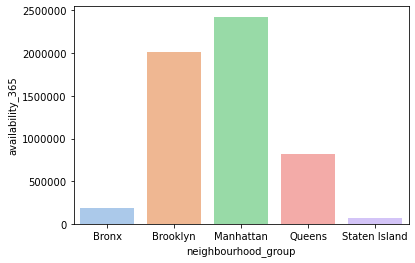

In [30]:
# No. Brooklyn has most rooms in this category (5012). Manhattan has most 'entire home' category
neighbourhood_group= df[['neighbourhood_group', 'availability_365']].groupby('neighbourhood_group').sum().reset_index()
sns.barplot(x="neighbourhood_group", y="availability_365", data=neighbourhood_group,  palette="pastel")
plt.ticklabel_format(style='plain', axis='y')

In [31]:
df_novo=id_ativos[['neighbourhood_group', 'availability_365', 'room_type']].groupby(['neighbourhood_group', 'room_type']).count()\
        .sort_values('availability_365', ascending=False)\
        .reset_index()

df_novo

,neighbourhood_group,room_type,availability_365
0,Manhattan,Entire home/apt,6529
1,Brooklyn,Entire home/apt,5423
2,Brooklyn,Private room,5012
3,Manhattan,Private room,4014
4,Queens,Private room,2158
5,Queens,Entire home/apt,1344
6,Bronx,Private room,446
7,Bronx,Entire home/apt,272
8,Manhattan,Shared room,267
9,Brooklyn,Shared room,225


##### H8 - At Bronx, 'Entire home/ap' rooms has the highest average availability period  

In [34]:
# No. It's the Private room category.
category = id_ativos[['room_type', 'neighbourhood_group', 'availability_365']].groupby(['room_type', 'neighbourhood_group']).mean().reset_index()
category

,room_type,neighbourhood_group,availability_365
0,Entire home/apt,Bronx,191.20221
1,Entire home/apt,Brooklyn,153.86373
2,Entire home/apt,Manhattan,169.40466
3,Entire home/apt,Queens,180.66295
4,Entire home/apt,Staten Island,204.47407
5,Private room,Bronx,204.00224
6,Private room,Brooklyn,170.71049
7,Private room,Manhattan,164.05580
8,Private room,Queens,192.33086
9,Private room,Staten Island,246.90541


In [35]:
category = category.where(category['neighbourhood_group'] == 'Bronx').dropna()
category

,room_type,neighbourhood_group,availability_365
0,Entire home/apt,Bronx,191.20221
5,Private room,Bronx,204.00224
10,Shared room,Bronx,181.78378


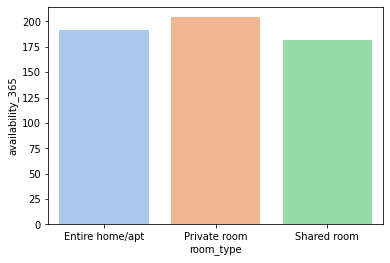

In [36]:
sns.barplot(x="room_type", y="availability_365", data=category,  palette="pastel")
plt.ticklabel_format(style='plain', axis='y')

##### H9 - In Manhattan, 'Entire home/ap' rooms has the highest price

In [37]:
# Yes
category_price_max = df[['room_type', 'price', 'neighbourhood_group']].groupby(['room_type', 'neighbourhood_group']).max().reset_index()

In [38]:
category_price_max = category_price_max.where(category_price_max['neighbourhood_group'] == 'Manhattan').dropna()
category_price_max

,room_type,neighbourhood_group,price
2,Entire home/apt,Manhattan,10000.00000
7,Private room,Manhattan,9999.00000
12,Shared room,Manhattan,1000.00000


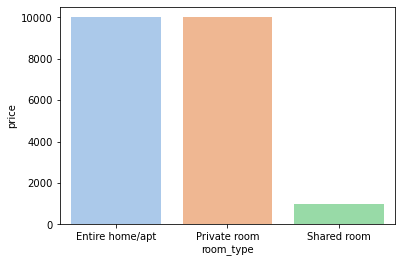

In [39]:
sns.barplot(x="room_type", y="price", data=category_price_max,  palette="pastel")
plt.ticklabel_format(style='plain', axis='y')

##### H10 - Private room is the category with most time available. In total and in average

In [42]:
# No. The category with most time available is 'Shared room'.
category_availability = df[['room_type', 'availability_365']].groupby(['room_type', 'availability_365']).max().reset_index()
category_availability

,room_type,availability_365
0,Entire home/apt,0
1,Entire home/apt,1
2,Entire home/apt,2
3,Entire home/apt,3
4,Entire home/apt,4
...,...,...
960,Shared room,361
961,Shared room,362
962,Shared room,363
963,Shared room,364


In [43]:
category_availability_mean = df[['room_type','availability_365', 'price']].groupby(['room_type']).mean().reset_index()
category_availability_mean

,room_type,availability_365,price
0,Entire home/apt,111.92030,211.79425
1,Private room,111.20393,89.78097
2,Shared room,162.00086,70.12759


##### H11 - Entire home/apt category is the one with less rentals, in average

In [44]:
# No. It's the category 'shared room'.
df[['room_type', 'number_of_reviews']].groupby('room_type').mean()

,number_of_reviews
room_type,
Entire home/apt,22.84242
Private room,24.11296
Shared room,16.60000


##### H12 - Private Room category, in Manhattan, is the one with the lowest price, compared to the others categories in the same region.

In [45]:
# No. The lowest price category is Shared room
price_manhattan = df.where(df['neighbourhood_group'] == 'Manhattan').dropna()
price_manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595.00000,Skylit Midtown Castle,2845.00000,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.00000,1.00000,45.00000,2019-05-21,0.38000,2.00000,355.00000
4,5022.00000,Entire Apt: Spacious Studio/Loft by central park,7192.00000,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.00000,10.00000,9.00000,2018-11-19,0.10000,1.00000,0.00000
5,5099.00000,Large Cozy 1 BR Apartment In Midtown East,7322.00000,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.00000,3.00000,74.00000,2019-06-22,0.59000,1.00000,129.00000
7,5178.00000,Large Furnished Room Near B'way,8967.00000,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.00000,2.00000,430.00000,2019-06-24,3.47000,1.00000,220.00000
8,5203.00000,Cozy Clean Guest Room - Family Apt,7490.00000,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.00000,2.00000,118.00000,2017-07-21,0.99000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48576,36318560.00000,Luxury Sun-filled Private Room near Time Square,52917571.00000,Linda Lou,Manhattan,Midtown,40.75286,-73.99297,Private room,120.00000,2.00000,1.00000,2019-07-06,1.00000,1.00000,7.00000
48601,36335990.00000,Sunny Studio steps from Wall Street,269870940.00000,Farina,Manhattan,Financial District,40.70603,-74.01084,Entire home/apt,75.00000,1.00000,1.00000,2019-07-03,1.00000,1.00000,181.00000
48634,36351128.00000,"One bedroom without roomies, close to everything",273361532.00000,David & Amy,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110.00000,3.00000,2.00000,2019-07-05,2.00000,1.00000,15.00000
48732,36411407.00000,Brand new 1 bedroom steps from Soho!,33917435.00000,Mike,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150.00000,4.00000,1.00000,2019-07-06,1.00000,1.00000,13.00000


In [46]:
price_manhattan = price_manhattan[['room_type','price']].groupby('room_type').mean()
price_manhattan

,price
room_type,
Entire home/apt,230.20096
Private room,106.60749
Shared room,77.98034


##### H13 - the region with the most rooms is Manhattan

In [47]:
# Yes.
df[['id', 'neighbourhood_group']].groupby('neighbourhood_group').count()

,id
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


##### H14 - The region with the most rooms is also the one with the most rented rooms

In [48]:
# No, Manhattan has the most available rooms (21661), 
# mas the most rented is in Broklyn = 486574
df[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').sum()

,number_of_reviews
neighbourhood_group,
Bronx,28371
Brooklyn,486574
Manhattan,454569
Queens,156950
Staten Island,11541


##### H15 - Manhattan is the region with, in average, the highest prices in the database

In [49]:
# Yes.
df[['neighbourhood_group','price']].groupby('neighbourhood_group').mean()

,price
neighbourhood_group,
Bronx,87.49679
Brooklyn,124.38321
Manhattan,196.87581
Queens,99.51765
Staten Island,114.81233


##### H16 - In average, the rooms in Brooklin, stays less time available for renting, or they are rented faster.

In [74]:
# Yes
df[['neighbourhood_group','availability_365']].groupby('neighbourhood_group').mean().sort_values('availability_365').reset_index()

,neighbourhood_group,availability_365
0,Brooklyn,100.23229
1,Manhattan,111.97941
2,Queens,144.45182
3,Bronx,165.75894
4,Staten Island,199.67828


##### H17 -'Upper West Side' neighbour, in Manhattan, is the one with, in average, the highest price in database

In [54]:
#R: Não, a maior média é Tribeca
media_bairro=df[['neighbourhood_group','neighbourhood', 'price']].groupby(['neighbourhood_group','neighbourhood']).mean().sort_values('price').reset_index()

media_bairro.where(media_bairro['neighbourhood_group']=='Manhattan').dropna()

,neighbourhood_group,neighbourhood,price
81,Manhattan,Inwood,88.89683
83,Manhattan,Marble Hill,89.16667
85,Manhattan,Washington Heights,89.61068
128,Manhattan,Roosevelt Island,113.25974
130,Manhattan,Morningside Heights,114.78324
136,Manhattan,Harlem,118.97404
142,Manhattan,Two Bridges,127.06944
148,Manhattan,East Harlem,133.19875
171,Manhattan,Chinatown,161.49728
175,Manhattan,Stuyvesant Town,169.10811


##### H18 - 'Tribeca' (Manhattan) is the neighbour with, in average, the most expensive rooms 

In [55]:
# No. It's Fort Wadsworth, in Staten Island.
media_bairro=df[['neighbourhood_group','neighbourhood', 'price']]\
                .groupby(['neighbourhood_group','neighbourhood'])\
                .mean()\
                .sort_values('price', ascending=False)\
                .reset_index()\
                .head(5)
media_bairro

,neighbourhood_group,neighbourhood,price
0,Staten Island,Fort Wadsworth,800.00000
1,Staten Island,Woodrow,700.00000
2,Manhattan,Tribeca,490.63842
3,Brooklyn,Sea Gate,487.85714
4,Bronx,Riverdale,442.09091


## Business problem

### Quais imóveis proporcionam maior rentabilidade ao investidor?

### Considerações:  Mais rentável é aquele imóvel que trará o retorno do investimento mais rapidamente. Portanto, entre os imóveis ativos, procura-se a localização dos imóveis que:


##### * Possuem o valor de diária mais altos.
###### * Sejam mais rápidos para alugar.

## 1. Rentabilidade por imóveis.


$$ rentability = \frac{price * (minimoum\_nights + 1) * number\_of\_reviews}{\sqrt{availability\_365}} $$

In [57]:
filtro1 = df['availability_365'] > 0
filtro2 = df['number_of_reviews'] > 0

##Filtro por availability e number_of_reviews > 0
df_rent = df.where(filtro1 & filtro2).dropna()

In [59]:
df_rent = df_rent.assign(rentabilidade = lambda x: (x.price * (x.minimum_nights + 1) * x.number_of_reviews) / (x.availability_365 ** 0.5) )\
        .sort_values('rentabilidade', ascending=False)  

df_rent.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rentabilidade
3605,2154075.00000,"Brooklyn Charm, Close to Manhattan (30+ Days O...",10992588.00000,Joni,Brooklyn,Bedford-Stuyvesant,40.68640,-73.94529,Entire home/apt,112.00000,200.00000,314.00000,2019-06-20,4.82000,2.00000,42.00000,1090734.58250
6375,4644632.00000,"Brooklyn Life, Easy to Manhattan (30+ Days only)",10992588.00000,Joni,Brooklyn,Bedford-Stuyvesant,40.68797,-73.94696,Entire home/apt,130.00000,200.00000,271.00000,2019-07-03,4.84000,2.00000,64.00000,885153.75000
12342,9528920.00000,"Quiet, Clean, Lit @ LES & Chinatown",3906464.00000,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999.00000,99.00000,6.00000,2016-01-01,0.14000,1.00000,83.00000,658519.70138
9422,7225366.00000,"Spacious, Modern Times Square 3Bdrm *****",9288577.00000,Tina,Manhattan,Chelsea,40.74923,-73.99376,Entire home/apt,450.00000,4.00000,206.00000,2019-07-03,4.24000,1.00000,1.00000,463500.00000
5499,3979611.00000,Located at the heart of Manhattan,19407840.00000,Peng,Manhattan,Roosevelt Island,40.75592,-73.95515,Entire home/apt,1400.00000,90.00000,31.00000,2015-12-03,0.53000,1.00000,88.00000,421007.45459


## 2. Rentabilidade média por região.
#### Na região de Manhatan, o bairro Roosevelt Island é o melhor para se adquirir um imóvel, visando a melhor rentabilidade média. 

In [60]:
df_rent[['neighbourhood_group','neighbourhood', 'rentabilidade']].groupby(['neighbourhood_group','neighbourhood']).mean().sort_values('rentabilidade').reset_index()


,neighbourhood_group,neighbourhood,rentabilidade
0,Staten Island,Oakwood,32.54424
1,Queens,Little Neck,56.39267
2,Bronx,West Farms,73.94243
3,Queens,Breezy Point,87.05125
4,Staten Island,Port Richmond,142.42274
...,...,...,...
212,Manhattan,Chelsea,6064.51844
213,Manhattan,Greenwich Village,6139.15704
214,Manhattan,Tribeca,7120.66983
215,Manhattan,Nolita,7499.06862


In [65]:
df_rent_regiao = df_rent[['neighbourhood_group','neighbourhood', 'rentabilidade']].groupby(['neighbourhood_group','neighbourhood']).mean().sort_values('rentabilidade').reset_index()


## 3. Rentabilidade na região de Roosevelt Island - Manhattan:

In [62]:
df_roosevelt = df_rent.where(df_rent['neighbourhood']=='Roosevelt Island').dropna().sort_values('rentabilidade', ascending=False)
df_roosevelt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rentabilidade
5499,3979611.00000,Located at the heart of Manhattan,19407840.00000,Peng,Manhattan,Roosevelt Island,40.75592,-73.95515,Entire home/apt,1400.00000,90.00000,31.00000,2015-12-03,0.53000,1.00000,88.00000,421007.45459
2617,1367775.00000,Furnished room with private bathroom,7419960.00000,Marilyn,Manhattan,Roosevelt Island,40.76175,-73.95012,Private room,54.00000,30.00000,5.00000,2018-08-18,0.15000,1.00000,2.00000,5918.48376
31368,24374428.00000,Quiet two BEDROOM APT in MANHATTAN UPPER EAST ...,183950956.00000,Dante,Manhattan,Roosevelt Island,40.75916,-73.95124,Entire home/apt,220.00000,1.00000,76.00000,2019-06-24,5.30000,1.00000,60.00000,4317.08544
28055,21913309.00000,One nice room on the Roosevelt Island; 罗岛一间卧室出租,159884558.00000,Lily,Manhattan,Roosevelt Island,40.76191,-73.94934,Private room,45.00000,25.00000,37.00000,2018-07-01,1.89000,1.00000,149.00000,3546.45498
9285,7093920.00000,Roosevelt Island Charm,37181980.00000,Svetlana,Manhattan,Roosevelt Island,40.76193,-73.94933,Private room,83.00000,2.00000,178.00000,2019-07-05,3.72000,1.00000,255.00000,2775.55130
5574,4053287.00000,Spacious Apartment with River Views!,21019260.00000,Michael And Donna,Manhattan,Roosevelt Island,40.76365,-73.94914,Entire home/apt,125.00000,60.00000,6.00000,2019-06-30,0.11000,1.00000,278.00000,2743.90266
22381,18076816.00000,Beautiful Island life in NYC,20600569.00000,Tiffany,Manhattan,Roosevelt Island,40.76213,-73.94971,Private room,100.00000,2.00000,97.00000,2019-06-21,3.57000,2.00000,142.00000,2442.01775
39797,30940780.00000,Waterfront Room with Manhattan View and Balcony,6983558.00000,Ben,Manhattan,Roosevelt Island,40.76358,-73.94761,Private room,150.00000,2.00000,14.00000,2019-07-07,2.25000,1.00000,7.00000,2381.17618
14054,10732197.00000,Live on an island in NYC!,22774265.00000,Pika,Manhattan,Roosevelt Island,40.76189,-73.94934,Private room,64.00000,3.00000,51.00000,2019-06-30,1.28000,1.00000,40.00000,2064.33486
37393,29678746.00000,KalaJones,84077949.00000,Gunmala,Manhattan,Roosevelt Island,40.76620,-73.94676,Entire home/apt,250.00000,3.00000,2.00000,2019-01-04,0.31000,1.00000,1.00000,2000.00000


## 4. Considerando um investimento para compra do imóvel mais rentável, de 1 milhão de dólares, qual será o tempo de retorno do investimento (roi)?


$$ return\_investment = \frac{investment}{price * (minimum\_nights + 1)} $$

In [63]:
df_rent = df_rent.assign(rentabilidade = lambda x: (x.price * (x.minimum_nights + 1) * x.number_of_reviews) / (x.availability_365 ** 0.5) )\
        .sort_values('rentabilidade', ascending=False)  

In [64]:
### Construção da tabela 'roi' ###
# Coluna 'roi' indica o nº de vezes que o imóvel precisa ser alugado, para retornar o valor do investimento.
# Consideranso o imóvel mais rentável (id= 7.8492) serão 7.84 locações
investimento=1000000
df_roosevelt.assign(roi=lambda x: (investimento/(x.price * (x.minimum_nights + 1))))\
                                    .sort_values('rentabilidade', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rentabilidade,roi
5499,3979611.00000,Located at the heart of Manhattan,19407840.00000,Peng,Manhattan,Roosevelt Island,40.75592,-73.95515,Entire home/apt,1400.00000,90.00000,31.00000,2015-12-03,0.53000,1.00000,88.00000,421007.45459,7.84929
2617,1367775.00000,Furnished room with private bathroom,7419960.00000,Marilyn,Manhattan,Roosevelt Island,40.76175,-73.95012,Private room,54.00000,30.00000,5.00000,2018-08-18,0.15000,1.00000,2.00000,5918.48376,597.37157
31368,24374428.00000,Quiet two BEDROOM APT in MANHATTAN UPPER EAST ...,183950956.00000,Dante,Manhattan,Roosevelt Island,40.75916,-73.95124,Entire home/apt,220.00000,1.00000,76.00000,2019-06-24,5.30000,1.00000,60.00000,4317.08544,2272.72727
28055,21913309.00000,One nice room on the Roosevelt Island; 罗岛一间卧室出租,159884558.00000,Lily,Manhattan,Roosevelt Island,40.76191,-73.94934,Private room,45.00000,25.00000,37.00000,2018-07-01,1.89000,1.00000,149.00000,3546.45498,854.70085
9285,7093920.00000,Roosevelt Island Charm,37181980.00000,Svetlana,Manhattan,Roosevelt Island,40.76193,-73.94933,Private room,83.00000,2.00000,178.00000,2019-07-05,3.72000,1.00000,255.00000,2775.55130,4016.06426
5574,4053287.00000,Spacious Apartment with River Views!,21019260.00000,Michael And Donna,Manhattan,Roosevelt Island,40.76365,-73.94914,Entire home/apt,125.00000,60.00000,6.00000,2019-06-30,0.11000,1.00000,278.00000,2743.90266,131.14754
22381,18076816.00000,Beautiful Island life in NYC,20600569.00000,Tiffany,Manhattan,Roosevelt Island,40.76213,-73.94971,Private room,100.00000,2.00000,97.00000,2019-06-21,3.57000,2.00000,142.00000,2442.01775,3333.33333
39797,30940780.00000,Waterfront Room with Manhattan View and Balcony,6983558.00000,Ben,Manhattan,Roosevelt Island,40.76358,-73.94761,Private room,150.00000,2.00000,14.00000,2019-07-07,2.25000,1.00000,7.00000,2381.17618,2222.22222
14054,10732197.00000,Live on an island in NYC!,22774265.00000,Pika,Manhattan,Roosevelt Island,40.76189,-73.94934,Private room,64.00000,3.00000,51.00000,2019-06-30,1.28000,1.00000,40.00000,2064.33486,3906.25000
37393,29678746.00000,KalaJones,84077949.00000,Gunmala,Manhattan,Roosevelt Island,40.76620,-73.94676,Entire home/apt,250.00000,3.00000,2.00000,2019-01-04,0.31000,1.00000,1.00000,2000.00000,1000.00000


In [66]:
df_roi = df_roosevelt.assign(roi=lambda x: (investimento/(x.price * (x.minimum_nights + 1))))\
                                    .sort_values('rentabilidade', ascending=False)

### Relatório .csv

In [69]:
# Rentabilidade por imóveis:
df_rent.to_csv('datasets/rent_imoveis.csv')

# Rentabilidade por região:
df_rent_regiao.to_csv('datasets/rent_regiao.csv')

# Rentabilidade - Roosevelt Island/Manhattan:
df_roosevelt.to_csv('datasets/rent_roosevelt.csv')

# Roi - Roosevelt Island/Manhattan:
df_roi.to_csv('datasets/roi.csv')

### Mapa demonstrativo por região, categoria de imóvel e rentabilidade

In [75]:
mapa_rent = df_rent[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','price', 'rentabilidade']].copy()

fig = px.scatter_mapbox( mapa_rent,
                   lat='latitude',
                   lon='longitude',
                   color='room_type',
                   size='rentabilidade',
                   color_continuous_scale=px.colors.cyclical.IceFire,
                   size_max=15,
                   zoom=10 )

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r':0, 'l':0, 'b':0, 't':0})
fig.show()
